In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
data = '../cars.csv'

import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(data, sep=';', header=None, names=['timestamp', 'n_cars'])
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S')
df = df.set_index(df.timestamp, drop=True)
df = df.drop(columns=['timestamp'])
df = df.sort_index()
print(df.shape)

(5770, 1)


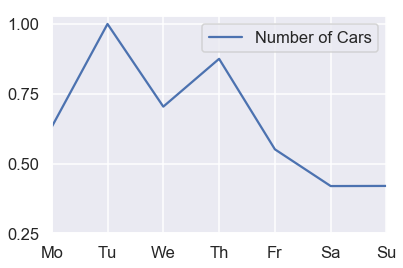

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

level_values = df.index.get_level_values
by_weekday = df.groupby(level_values(0).dayofweek).sum()
by_weekday['Number of Cars'] = by_weekday['n_cars'] /  by_weekday['n_cars'].max()
#by_weekday['Number of Cars'] = by_weekday['n_cars']
by_weekday.index = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
plot = by_weekday[['Number of Cars']].plot(yticks=[0.25, 0.5, 0.75, 1.0])
#by_weekday[['Number of Cars']].plot(yticks)

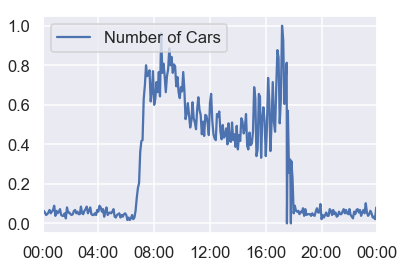

In [4]:
level_values = df.index.get_level_values
by_time = df.groupby(df.index.time).sum()
by_time['Number of Cars'] = by_time['n_cars'] / by_time['n_cars'].max()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
plot = by_time['Number of Cars'].plot(xticks=[0, 14400, 28800, 43200, 57600, 72000, 86400]) #
plot.set_xlabel("")
plot.legend(["Number of Cars"]);